# Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from haversine import haversine
import seaborn as sns

# Reading the data

In [2]:
data=pd.read_csv("C:/Users/AYRUS/Desktop/nyc_taxi_trip_duration.csv")

In [3]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


# Performing EDA

In [4]:
# Converting vendor_id and store_and_fwd_flag as category
data['vendor_id']=data['vendor_id'].astype('category')
data['store_and_fwd_flag']=data['store_and_fwd_flag'].astype('category')

In [5]:
# Converting pickup_datetime and dropoff_datetime in datetime format
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'],format='%Y-%m-%d %H:%M:%S')

# Extracting More information from datetime columns

In [6]:
# Creating new column and storing hour value
data['pickup_hour']=data['pickup_datetime'].dt.hour

In [7]:
# Creating new column and storing pickup time of day value
data['pick_time_of_the_day']=data.pickup_hour.apply(lambda y:(y%24+4)//4).replace({1:'Late Night',
                                                                                   2:'Early Morning',
                                                                                   3:'Morning',
                                                                                   4:'Afternoon',
                                                                                   5:'Evening',
                                                                                   6:'Night'})

In [8]:
# Creating new day_of_the_week column which stores the day of week
data['day_of_the_week']=data.pickup_datetime.apply(lambda x:x.day_name())

In [9]:
# Converting  trip duration in hours to second
data['trip_duration_in_hours']=data.trip_duration.apply(lambda x: x/3600)

In [10]:
data['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
672240          1
102646          1
533760          1
512833          1
622664          1
Name: trip_duration, Length: 729322, dtype: int64

In [11]:
data.drop(data[data['trip_duration']==1939736].index,inplace=True)

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

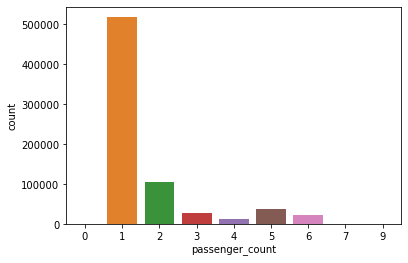

In [12]:
sns.countplot(x='passenger_count',data=data)

In [13]:
data.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

In [14]:
data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]

In [15]:
data.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

In [16]:
#Transforming day of week - Monday (0) to Sunday (6)
data['pickup_day_of_week']=data['pickup_datetime'].dt.dayofweek

In [17]:
#Transforming pick up time of the day
condition=[data['pick_time_of_the_day']=='Late Night',
           data['pick_time_of_the_day']=='Early Morning',
           data['pick_time_of_the_day']=='Morning',
           data['pick_time_of_the_day']=='Afternoon',
           data['pick_time_of_the_day']=='Evening',
           data['pick_time_of_the_day']=='Night']

choice=[0,1,2,3,4,5]

data['pick_time_of_the_day_in_numbers']=np.select(condition,choice)

In [18]:
# define a function to calculate distance 
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)


In [19]:
# creating a new column to store the distance value
data['total_distance'] = data.apply(lambda x: calc_distance(x), axis = 1)

In [20]:
# calculating speed 
data['speed'] = (data.total_distance/(data.trip_duration/3600))

# Shuffling and Creating Train and Test Set

In [21]:
from sklearn.utils import shuffle

# Shuffling the Dataset
data = shuffle(data, random_state = 42)

#creating 4 divisions
div = int(data.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]

In [22]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pick_time_of_the_day,day_of_the_week,trip_duration_in_hours,pickup_day_of_week,pick_time_of_the_day_in_numbers,total_distance,speed
327115,id3409206,1,2016-04-13 19:13:06,2016-04-13 20:09:14,1,-73.991814,40.744064,-73.907669,40.683575,N,3368,19,Evening,Wednesday,0.935556,2,4,9.774321,10.447612
642546,id0775978,1,2016-03-09 22:45:37,2016-03-09 22:54:14,2,-73.991463,40.745068,-73.973129,40.756336,N,517,22,Night,Wednesday,0.143611,2,5,1.988731,13.848031
500012,id2056331,1,2016-03-23 22:46:29,2016-03-23 22:53:36,2,-73.984879,40.742359,-73.990654,40.724621,N,427,22,Night,Wednesday,0.118611,2,5,2.031560,17.127905
217796,id0698750,2,2016-01-01 03:13:08,2016-01-01 03:31:02,1,-73.943489,40.787701,-73.882362,40.829941,N,1074,3,Late Night,Friday,0.298333,4,0,6.966188,23.350350
319765,id2047272,2,2016-03-08 22:12:53,2016-03-08 22:20:18,3,-73.981354,40.747139,-74.003647,40.741589,N,445,22,Night,Tuesday,0.123611,1,5,1.976883,15.992759


In [23]:
test.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pick_time_of_the_day,day_of_the_week,trip_duration_in_hours,pickup_day_of_week,pick_time_of_the_day_in_numbers,total_distance,speed
546964,id0107411,2,2016-02-23 15:22:09,2016-02-23 15:29:57,1,-73.957359,40.785664,-73.963364,40.775875,N,468,15,Afternoon,Tuesday,0.130000,1,3,1.200115,9.231655
207141,id2054450,1,2016-06-02 14:52:46,2016-06-02 15:49:14,1,-73.863258,40.769756,-73.980888,40.764374,N,3388,14,Afternoon,Thursday,0.941111,3,3,9.924377,10.545383
637544,id3748355,2,2016-06-24 09:33:41,2016-06-24 09:38:29,1,-73.966644,40.757729,-73.970009,40.750610,N,288,9,Morning,Friday,0.080000,4,2,0.840719,10.508990
721586,id2252210,1,2016-06-26 22:24:27,2016-06-26 22:37:12,1,-73.966293,40.767910,-73.986977,40.726765,N,765,22,Night,Sunday,0.212500,6,5,4.895707,23.038622
639710,id3986761,2,2016-01-11 01:41:02,2016-01-11 01:49:06,1,-74.005028,40.722752,-73.978699,40.740940,N,484,1,Late Night,Monday,0.134444,0,0,3.002018,22.329062


In [24]:
# storing simple mean in a new column in the test set as "simple_mean"
test['simple_mean'] = train['trip_duration'].mean()

# Importing Mean Absolute Error 

In [25]:
#calculating mean absolute error
from sklearn.metrics import mean_absolute_error as MAE

simple_mean_error = MAE(test['trip_duration'] , test['simple_mean'])
k1=simple_mean_error
print(k1)



619.2166118070093


# Mean of trip duration with respect to day of week

In [26]:
day_of_week = pd.pivot_table(train, values='trip_duration', index = ['day_of_the_week'], aggfunc=np.mean)
day_of_week

,trip_duration
day_of_the_week,
Friday,991.163134
Monday,887.608527
Saturday,913.308500
Sunday,895.722581
Thursday,1000.425391
Tuesday,951.364416
Wednesday,976.745333


In [27]:
# initializing new column to zero
test['day_of_week_mean'] = 0

# For every unique entry in day_of_the_week
for i in train['day_of_the_week'].unique():
  # Assign the mean value corresponding to unique entry
  test['day_of_week_mean'][test['day_of_the_week'] == str(i)] = train['trip_duration'][train['day_of_the_week'] == str(i)].mean()

In [28]:
# Calculating mean absolute error
day_of_week_error = MAE(test['trip_duration'] , test['day_of_week_mean'] )
k2=day_of_week_error
print(k2)

617.8423952237875


# Mean of trip duration with respect to pick time of the day

In [29]:
pick_time_ofday = pd.pivot_table(train, values='trip_duration', index = ['pick_time_of_the_day'], aggfunc=np.mean)
pick_time_ofday

,trip_duration
pick_time_of_the_day,
Afternoon,1036.265361
Early Morning,803.841514
Evening,993.368725
Late Night,900.405327
Morning,936.597452
Night,902.440389


In [30]:
# Intialising new column to 0
test['pick_time_of_day_mean'] = 0

# For every unique entry in pick time of the day
for i in train['pick_time_of_the_day'].unique():
  # Assign the mean value corresponding to unique entry
  test['pick_time_of_day_mean'][test['pick_time_of_the_day'] == i] = train['trip_duration'][train['pick_time_of_the_day'] == i].mean()

In [31]:
# calculating mean absolute error
pick_time_of_day_mean = MAE(test['trip_duration'] , test['pick_time_of_day_mean'] )
k3=pick_time_of_day_mean
print(k3)

617.2126886180122


# Mean of trip duration with respect to (day of week , pick time of the day)

In [32]:
combine_error = pd.pivot_table(train, values = 'trip_duration', index = ['day_of_the_week','pick_time_of_the_day'], aggfunc = np.mean)
combine_error

trip_duration
day_of_the_week pick_time_of_the_day               
Friday          Afternoon               1112.996287
                Early Morning            827.379850
                Evening                 1030.498331
                Late Night               930.599739
                Morning                  970.067302
                Night                    963.237128
Monday          Afternoon                969.098355
                Early Morning            806.133631
                Evening                  902.258530
                Late Night               824.975474
                Morning                  928.543204
                Night                    803.730506
Saturday        Afternoon                911.925256
                Early Morning            821.376752
                Evening                  953.253432
                Late Night              1002.974466
                Morning                  767.335642
                Night                    930.558050
Sunday          Afternoon                974.057451
                Early Morning            861.982496
                Evening                  984.909267
                Late Night               889.631985
                Morning                  713.518252
                Night                    865.551665
Thursday        Afternoon               1122.625688
                Early Morning            797.625035
                Evening                 1039.956102
                Late Night               789.184609
                Morning                 1047.875391
                Night                    960.755472
Tuesday         Afternoon               1050.837115
                Early Morning            732.572561
                Evening                  999.479825
                Late Night               859.441383
                Morning                 1022.606745
                Night                    859.987412
Wednesday       Afternoon               1114.302747
                Early Morning            809.201041
                Evening                 1038.884893
                Late Night               792.122238
                Morning                 1000.712488
                Night                    889.034803

In [33]:
# intialising new empty column
test['Super_mean'] = 0

# Assigning variables to strings ( to shorten code length)
s2 = 'day_of_the_week'
s1 = 'pick_time_of_the_day'

# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2
  for j in test[s2].unique():
    # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 simultaneously
    test['Super_mean'][(test[s1] == i) & (test[s2]==str(j))] = train['trip_duration'][(train[s1] == i) & (train[s2]==str(j))].mean()

In [34]:
# calculating mean absolute error
super_mean_error = MAE(test['trip_duration'] , test['Super_mean'] )
k4=super_mean_error
print(k4)

614.2076349732165


# Mean Error of trip duration with respect to vendor id and pick time of the day

In [35]:
combine_error2 = pd.pivot_table(train, values = 'trip_duration', index = ['vendor_id','pick_time_of_the_day'], aggfunc = np.mean)
combine_error2

trip_duration
vendor_id pick_time_of_the_day               
1         Afternoon                919.080553
          Early Morning            700.924005
          Evening                  874.475381
          Late Night               736.865394
          Morning                  845.294923
          Night                    791.386258
2         Afternoon               1140.209045
          Early Morning            900.803300
          Evening                 1094.252714
          Late Night              1046.911520
          Morning                 1014.371861
          Night                    996.309600

In [36]:
# intialising new empty column
test['Super_mean2'] = 0

# Assigning variables to strings ( to shorten code length)
s3 = 'vendor_id'
s1 = 'pick_time_of_the_day'

# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2
  for j in test[s3].unique():
    # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 simultaneously
    test['Super_mean2'][(test[s1] == i) & (test[s3]==str(j))] = train['trip_duration'][(train[s1] == i) & (train[s3]==str(j))].mean()

In [37]:
# calculating mean absolute error
super_mean_error2 = MAE(test['trip_duration'] , test['Super_mean2'] )
k5=super_mean_error2
print(k5)

955.9752624884534


# Mean Error of trip duration with respect to vendor id and day of the week

In [38]:
combine_error3 = pd.pivot_table(train, values = 'trip_duration', index = ['vendor_id','day_of_the_week'], aggfunc = np.mean)
combine_error3

trip_duration
vendor_id day_of_the_week               
1         Friday              865.987889
          Monday              802.823595
          Saturday            777.348877
          Sunday              753.822135
          Thursday            887.225736
          Tuesday             847.620776
          Wednesday           876.870775
2         Friday             1099.800625
          Monday              960.821436
          Saturday           1030.426555
          Sunday             1017.217663
          Thursday           1100.434994
          Tuesday            1040.593231
          Wednesday          1064.684819

In [39]:
# intialising new empty column
test['Super_mean3'] = 0

# Assigning variables to strings ( to shorten code length)
s3 = 'vendor_id'
s1 = 'day_of_the_week'

# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2
  for j in test[s3].unique():
    # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 simultaneously
    test['Super_mean3'][(test[s1] == i) & (test[s3]==str(j))] = train['trip_duration'][(train[s1] == i) & (train[s3]==str(j))].mean()

In [40]:
# calculating mean absolute error
super_mean_error3 = MAE(test['trip_duration'] , test['Super_mean3'] )
k6=super_mean_error3
print(k6)

955.9752624884534


# create data for bar plot

<function matplotlib.pyplot.show(close=None, block=None)>

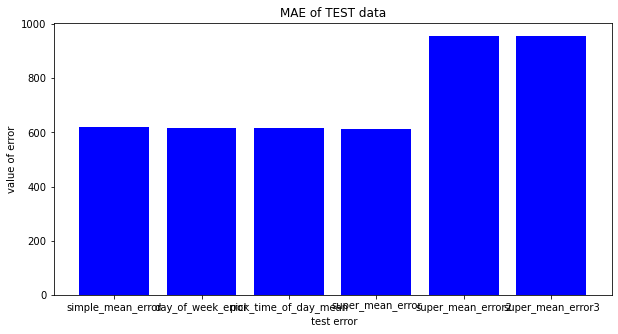

In [41]:

# creating data for bar plot
create_data={'simple_mean_error':k1,
            'day_of_week_error':k2,
            'pick_time_of_day_mean':k3,
            'super_mean_error':k4,
            'super_mean_error2':k5,
            'super_mean_error3':k6}

display=list(create_data.keys())
value=list(create_data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(display, value, color ='blue',
        )

plt.xlabel(" test error")
plt.ylabel("value of error")
plt.title("MAE of TEST data")
plt.show